In [1]:
from Functions_Lab6 import*

In [2]:
dataPath = '../DL_course_data/Lab5/HCP_lab/'
train_subjects_list = ['599469', '599671', '601127'] # your choice of 3 training subjects
val_subjects_list = ['613538']# your choice of 1 validation subjects 
bundles_list = ['CST_left', 'CST_right']
n_tracts_per_bundle = 20
X_train, y_train = load_streamlines(dataPath, train_subjects_list, bundles_list, n_tracts_per_bundle)
X_val, y_val = load_streamlines(dataPath, val_subjects_list, bundles_list, n_tracts_per_bundle)

In [3]:
len_max_train=search_len_max(X_train)
len_max_val=search_len_max(X_val)
len_max=max(len_max_train,len_max_val)

In [4]:
X_train=pad_sequences(X_train,maxlen=len_max)
X_val=pad_sequences(X_val,maxlen=len_max)

In [7]:
def model_class_padded(units,dr,batch_size,len_max):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, return_sequences=True,stateful=True), batch_input_shape=(batch_size,len_max,3)))
    model.add(Dropout(dr))
    
    model.add(LSTM(units,return_sequences=True,stateful=True))
    model.add(Dropout(dr))
    
    model.add(LSTM(units,return_sequences=True,stateful=True))
    model.add(Dropout(dr))
    
    model.add(LSTM(units,stateful=True))
    model.add(Dropout(dr))
    
    model.add(Dense(1,activation='sigmoid'))
    
    #model.summary()
    return model

In [8]:
units = 10
dr = 0.2
lr=0.001
n_epochs=50
optimizer = Adam(lr)

model = model_class_padded(units,dr,batch_size=8,len_max=len_max)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['binary_accuracy'])
model_fit = model.fit_generator(MyBatchGenerator(X_train, y_train, batch_size=8), epochs=n_epochs, validation_data=MyBatchGenerator(X_val, y_val, batch_size=8), validation_steps=len(X_val))


W1006 12:19:18.266762 139650123003648 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f01b01d9ac8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:19:18.269528 139650123003648 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f01b00cf278>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:19:18.408455 139650123003648 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f01b00cfb00>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:19:18.559269 139650123003648 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f01b020b908>: Note that this layer is not optimized for performance. Please use tf.keras.laye

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (8, 37, 20)               1120      
_________________________________________________________________
dropout_4 (Dropout)          (8, 37, 20)               0         
_________________________________________________________________
unified_lstm_6 (UnifiedLSTM) (8, 37, 10)               1240      
_________________________________________________________________
dropout_5 (Dropout)          (8, 37, 10)               0         
_________________________________________________________________
unified_lstm_7 (UnifiedLSTM) (8, 37, 10)               840       
_________________________________________________________________
dropout_6 (Dropout)          (8, 37, 10)               0         
_________________________________________________________________
unified_lstm_8 (UnifiedLSTM) (8, 10)                  

Epoch 44/50
15/15 [==============================] - 1s 69ms/step - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0033 - val_binary_accuracy: 1.0000
Epoch 45/50
15/15 [==============================] - 1s 65ms/step - loss: 0.0053 - binary_accuracy: 1.0000 - val_loss: 0.0032 - val_binary_accuracy: 1.0000
Epoch 46/50
15/15 [==============================] - 1s 71ms/step - loss: 0.0053 - binary_accuracy: 1.0000 - val_loss: 0.0031 - val_binary_accuracy: 1.0000
Epoch 47/50
15/15 [==============================] - 1s 73ms/step - loss: 0.0054 - binary_accuracy: 1.0000 - val_loss: 0.0030 - val_binary_accuracy: 1.0000
Epoch 48/50
15/15 [==============================] - 1s 68ms/step - loss: 0.0048 - binary_accuracy: 1.0000 - val_loss: 0.0029 - val_binary_accuracy: 1.0000
Epoch 49/50
15/15 [==============================] - 1s 67ms/step - loss: 0.0050 - binary_accuracy: 1.0000 - val_loss: 0.0028 - val_binary_accuracy: 1.0000
Epoch 50/50
15/15 [==============================] - 1s 67ms/ste

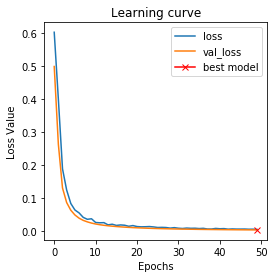

In [9]:
loss_curves_plot(model_fit)

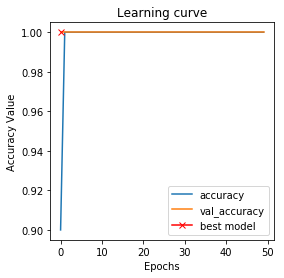

In [10]:
accuracy_curves_plot(model_fit,'binary_accuracy')